<a href="https://colab.research.google.com/github/Jonathan-Hughes1524/Wine-Sales/blob/main/Wine_Sale_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading and Exploring Data

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


In [2]:
#Mount Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load data and make eda copy for data cleaing
path = '/content/drive/MyDrive/Coding Dojo/08 Week 8:/wine.csv'
df = pd.read_csv(path)
eda_df = df.copy()
eda_df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [4]:
#Check data types and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [5]:
# Check duplicates
eda_df.duplicated().sum()

5452

In [6]:
# Drop duplicates
eda_df = eda_df.drop_duplicates()
eda_df.duplicated().sum()

0

In [7]:
for col in eda_df.select_dtypes('object'):
  print(eda_df[col].value_counts())

Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero             1
El Jardin de las Iguales Vinedo

In [8]:
#Check for missing
eda_df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

In [9]:
#Locating all missings
eda_df.loc[eda_df.isna().any(axis=1)]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50000,Ribera Del Duero Red,5.0,3.0
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45000,Red,NaN,NaN
2022,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50000,Ribera Del Duero Red,NaN,NaN
2023,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63000,Ribera Del Duero Red,NaN,NaN
2024,Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00000,Rioja Red,NaN,NaN


In [10]:
#View missing year
eda_df[eda_df['year'].isna()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0
851,La Unica,Fourth Edition,NaN,4.4,131,Espana,Vino de Espana,40.0,Tempranillo,4.0,2.0


In [11]:
#View missing body
eda_df[eda_df['body'].isna()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45000,Red,NaN,NaN
2022,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50000,Ribera Del Duero Red,NaN,NaN
2023,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63000,Ribera Del Duero Red,NaN,NaN
2024,Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00000,Rioja Red,NaN,NaN


In [12]:
#View missing type
eda_df[eda_df['type'].isna()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1934,Gramona,Gessami,2020,4.2,692,Espana,Penedes,11.20000,NaN,NaN,NaN
1982,Emilio Moro,La Revelia Godello,2018,4.2,484,Espana,Bierzo,21.95000,NaN,NaN,NaN
1995,Culebron,Fondillon Gran Reserva,1964,4.2,432,Espana,Alicante,49.95000,NaN,NaN,NaN
2011,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN


In [13]:
#View missing acidity
eda_df[eda_df['acidity'].isna()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45000,Red,NaN,NaN
2022,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50000,Ribera Del Duero Red,NaN,NaN
2023,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63000,Ribera Del Duero Red,NaN,NaN
2024,Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00000,Rioja Red,NaN,NaN


For the body and acidity I am going to do the average for thos. For the missing type I will do the most frequent to fill in the missing. For the year I am going to drop the rows for that since I will still have 99.7% of the data for that column.

This will be dealt with later in our machine learning process.

In [14]:
eda_df.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

In [15]:
dtypes = eda_df.dtypes
str_cols = dtypes[dtypes == 'object'].index
str_cols

Index(['winery', 'wine', 'year', 'country', 'region', 'type'], dtype='object')

In [16]:
for col in str_cols:
  print(f'- Columns={col}')
  print(eda_df[col].value_counts(dropna = False))
  print('\n\n')

- Columns=winery
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64



- Columns=wine
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero           

In [17]:
dtypes = eda_df.dtypes
str_cols = dtypes[dtypes == 'float'].index
str_cols

Index(['rating', 'price', 'body', 'acidity'], dtype='object')

In [18]:
for float in str_cols:
  print(f'- Columns={float}')
  print(eda_df[float].value_counts(dropna = False))
  print('\n\n')

- Columns=rating
4.3    706
4.4    484
4.5    281
4.2    228
4.6    191
4.7    112
4.8     44
4.9      2
Name: rating, dtype: int64



- Columns=price
75.00     16
95.00     12
34.90     12
59.90     12
26.90     11
          ..
75.92      1
47.52      1
94.20      1
185.15     1
995.00     1
Name: price, Length: 1292, dtype: int64



- Columns=body
4.0    1003
5.0     634
NaN     271
3.0     106
2.0      34
Name: body, dtype: int64



- Columns=acidity
3.0    1672
NaN     271
2.0      70
1.0      35
Name: acidity, dtype: int64





#Visualizations of data

<AxesSubplot:>

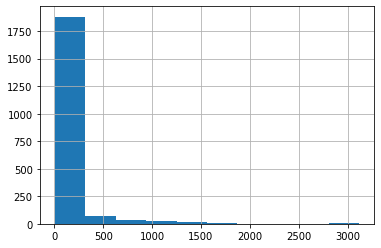

In [19]:
# target visualization 
eda_df['price'].hist()

There are few outliers here but the price does seem reasonable.

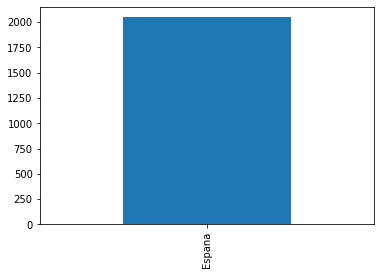

In [20]:
eda_df['country'].value_counts().plot(kind='bar');

No outliers but this seems to be data that isn't needed since all wines are from here.

<AxesSubplot:>

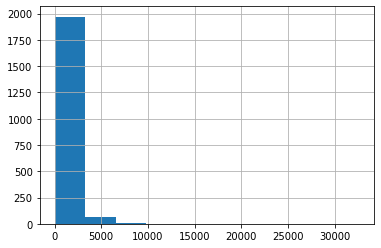

In [21]:
eda_df['num_reviews'].hist()

There don't appear to be outliers.

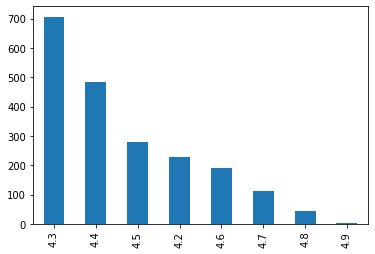

In [22]:
eda_df['rating'].value_counts().plot(kind='bar');

There is one outlier but it seems reasonable.

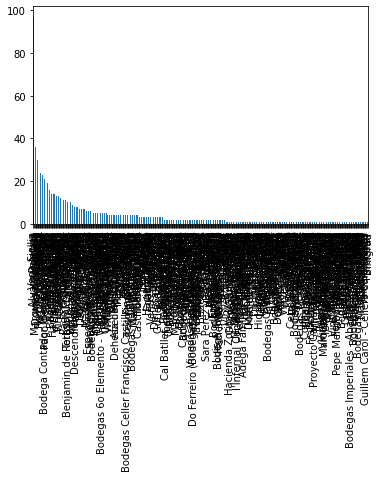

<Figure size 1800x1080 with 0 Axes>

In [23]:
eda_df['winery'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.figure(figsize=(25,15));

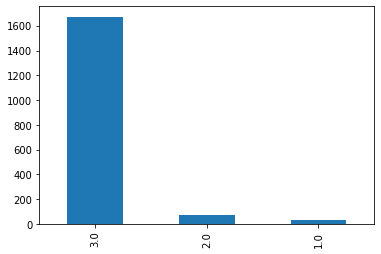

In [24]:
eda_df['acidity'].value_counts().plot(kind='bar');

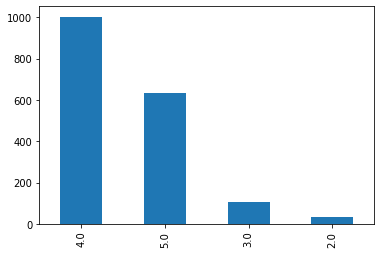

In [25]:
eda_df['body'].value_counts().plot(kind='bar');

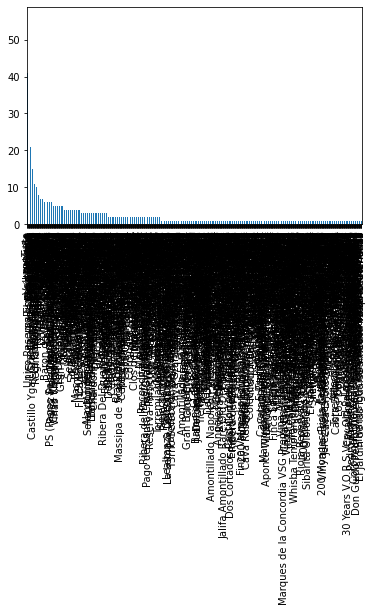

In [26]:
eda_df['wine'].value_counts().plot(kind='bar')
plt.xticks(rotation=90);

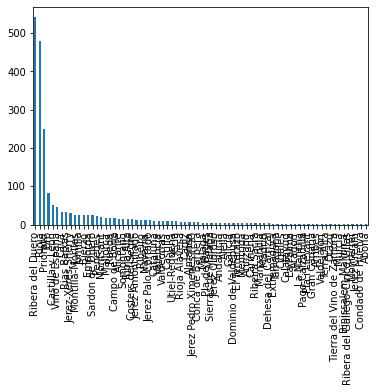

In [27]:
eda_df['region'].value_counts().plot(kind='bar');

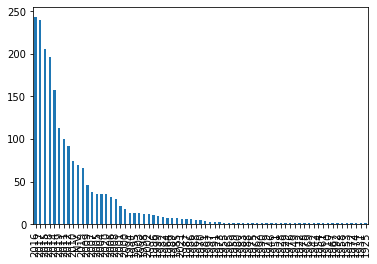

In [28]:
eda_df['year'].value_counts().plot(kind='bar')
plt.xticks(rotation=90);

#Correlation and Visualization

In [29]:
corr = eda_df.corr()

<AxesSubplot:>

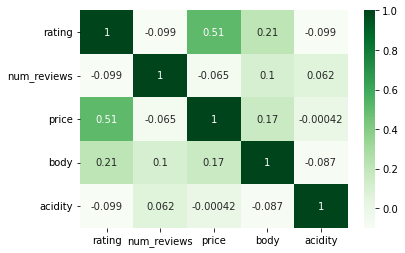

In [30]:
#Heat Map 
sns.heatmap(corr, cmap='Greens', annot= True)

Based on the heat map which shows correlation between features. We can see a correlation between price and rating. We also see a slight correlation between body and rating. 

<AxesSubplot:xlabel='rating', ylabel='price'>

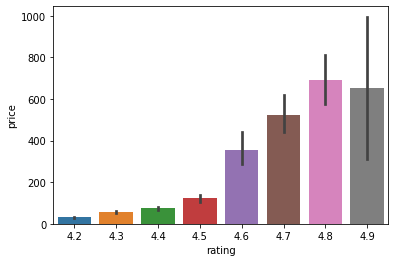

In [31]:
sns.barplot(data = eda_df, x = 'rating', y = 'price')

From this bar graph above you are able to see that the better the rating the more people are willing to pay for their wine. It is my recommendation to improve the wines raiting to see a higher profit on the investment. To achieve this we shall look at body and how it relates to rating.

<AxesSubplot:xlabel='rating', ylabel='body'>

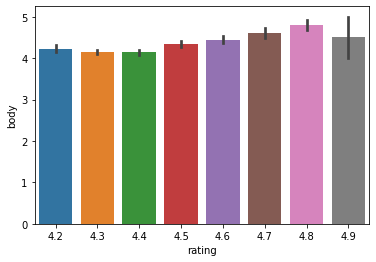

In [32]:
sns.barplot(data = eda_df, x='rating', y='body')

The data here shows us that body does have some affect on the rating. We can see that all of the high ratings, which are the higher prices, have a high body. For the wine to make the most money we need a higher rating. Having a good bodied wine will increase the rating into the range we want

In [33]:
!pip install dython
from dython.nominal import associations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


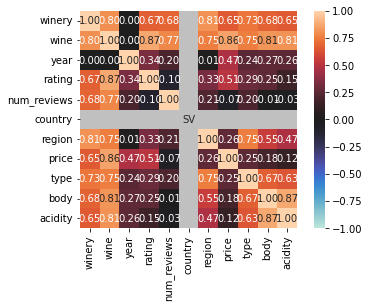

{'corr':                winery      wine      year    rating  num_reviews  country  \
 winery       1.000000  0.803182  0.000000  0.669809     0.683594      0.0   
 wine         0.803182  1.000000  0.000000  0.874033     0.774038      0.0   
 year         0.000000  0.000000  1.000000  0.342570     0.199015      0.0   
 rating       0.669809  0.874033  0.342570  1.000000    -0.098582      0.0   
 num_reviews  0.683594  0.774038  0.199015 -0.098582     1.000000      0.0   
 country      0.000000  0.000000  0.000000  0.000000     0.000000      0.0   
 region       0.807281  0.750822  0.011150  0.330868     0.214327      0.0   
 price        0.651181  0.858688  0.470884  0.507287    -0.065395      0.0   
 type         0.728358  0.750869  0.242304  0.292851     0.204457      0.0   
 body         0.676636  0.814446  0.265090  0.253934    -0.012835      0.0   
 acidity      0.651469  0.806398  0.256086  0.152917    -0.034882      0.0   
 
                region     price      type      body  

In [69]:
associations(eda_df)

#Model Development

In [70]:
#Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [188]:
ml_df = df.copy()
ml_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


Making a copy of original data to perform machine learning on.

In [189]:
ml_df.duplicated().sum()

5452

In [190]:
#Drop duplicates
ml_df = ml_df.drop_duplicates()
ml_df.duplicated().sum()

0

In [225]:
#Check for missing
ml_df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

Missings will be dealt during the machine learning pipeline. 

Based on the association from above during the cleaning I will be dropping the columns 'country' and 'region' because they don't have a strong assocaition with price. 

In [226]:
ml_df.drop(columns=['region','country'], inplace=True)

In [227]:
#Assign the target and feature
y = ml_df['price']
X = ml_df.drop(columns='price')

In [228]:
#Train Test Split the Data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [229]:
#Pre-process for Machine Learning with a pipeline
#Dummy encode the categorical feature(s) using OneHotEncoder (this will be a part of our pipeline)
#Scale teh quantitative feature(s) using StandardScaler so it (this will be pare of our pipeline)

#There is only one categorical feature (column) here but it can be very helpful to define a variable for each type of feature... be careful defing features based only on dtype
cat_feat = make_column_selector(dtype_include = 'object')
#This will identify all the quantitavi features columns
quant_feat = make_column_selector(dtype_include ='number')

#Instantiate the column transformer you want to use
encoder = OneHotEncoder(sparse= False, handle_unknown = 'ignore')

#Scale the data to be ready for clustering (KNN)
scaler = StandardScaler()

#We will use mean imputer to impute values missing for the numeric columns
mean_imputer = SimpleImputer(strategy='mean')

#We will use most frequent imputer to impute values for the categorical columns
freq_imputer = SimpleImputer(strategy='most_frequent')

In [230]:
num_processor = make_pipeline(mean_imputer, scaler)
cat_processor = make_pipeline(freq_imputer, encoder)

In [231]:
num_tuple = (num_processor, quant_feat)
cat_tuple = (cat_processor, cat_feat)

In [232]:
#Now make the column transformer... this matches the transformations that we want with teh approriate columns.
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder ='passthrough')

In [233]:
#Try a default KNN model in the pipeline
#Instantiate the model
knn = KNeighborsRegressor()

#Make the pipeline...notice we included teh column_transformer her
knn_pipe = make_pipeline(column_transformer, knn)

In [234]:
#Fit on training data only
knn_pipe.fit(X_train, y_train)

#Obtain evaluation metrics on both the train and test sets.
print('KNN Training RMSE:', np.sqrt(mean_squared_error(y_train, knn_pipe.predict(X_train))))
print('KNN Test RMSE:', np.sqrt(mean_squared_error(y_test,knn_pipe.predict(X_test))))
print('-----')
print('KNN Training R2:', r2_score(y_train, knn_pipe.predict(X_train)))
print('KNN Testing R2:', r2_score(y_test, knn_pipe.predict(X_test)))

KNN Training RMSE: 116.43955051980967
KNN Test RMSE: 171.91515129997822
-----
KNN Training R2: 0.8217290686713979
KNN Testing R2: 0.5644332494491799


In [235]:
#Hypertune the KNN model
# The following code gvies a lits of hyperparameters to tune and how to define them within a pipeline usoing the model name

knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff31c4eca10>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   spars

In [236]:
#Define the hyperparameters you want to test
knn_params = {'kneighborsregressor__n_neighbors':[5,7,9,11],
              'kneighborsregressor__leaf_size':[15,20,30]}

In [237]:
#Instantiate the GridSearch with the KNN pipeline and the knn_params
knn_gs = GridSearchCV(knn_pipe, knn_params)




In [238]:
knn_gs.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff31c4eca10>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [239]:
#see which hyperparameters gave the best results
knn_gs.best_params_

{'kneighborsregressor__leaf_size': 15, 'kneighborsregressor__n_neighbors': 9}

In [240]:
print('KNN_GS Training RMSE:', np.sqrt(mean_squared_error(y_train, knn_gs.predict(X_train))))
print('KNN_GS Test RMSE:', np.sqrt(mean_squared_error(y_test,knn_gs.predict(X_test))))
print('-----')
print('KNN_GS Training R2:', r2_score(y_train, knn_gs.predict(X_train)))
print('KNN_GS Testing R2:', r2_score(y_test, knn_gs.predict(X_test)))

KNN_GS Training RMSE: 136.37236655701446
KNN_GS Test RMSE: 174.7422276892105
-----
KNN_GS Training R2: 0.7554699441517364
KNN_GS Testing R2: 0.5499900168605133


In [241]:
#Try a default linear regression model in the pipeline
#Instantiate the model, notice that you can change the hyperparameters in this step. This just shows setting a random_state
# We will use defualts here since our hyperparameters will be done with GridSearchCV
lr = LinearRegression()

In [242]:
#Make the pipeline and include the column_transformer
lr_pipe = make_pipeline(column_transformer, lr)
#fit on teh training data
lr_pipe.fit(X_train,y_train)

#Obtain evaluation metrics on both train and test sets
print('RF Training RMSE:', np.sqrt(mean_squared_error(y_train, lr_pipe.predict(X_train))))
print('RF Testing RMSE:', np.sqrt(mean_squared_error(y_test, lr_pipe.predict(X_test))))
print('RF Training R2:', r2_score(y_train, lr_pipe.predict(X_train)))
print('RF Testing R2:', r2_score(y_test, lr_pipe.predict(X_test)))

RF Training RMSE: 90.22762712274984
RF Testing RMSE: 75352984217647.19
RF Training R2: 0.8929569278446096
RF Testing R2: -8.36810893752042e+22


Based on the models and hypertuning them the KNN model is the best one to use. However, I am going to attempt PCA model to see if there are better results.

#PCA Model

In [243]:
#Import Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [244]:
pca_pipe = make_pipeline(column_transformer)

In [245]:
pca_df= pca_pipe.fit_transform(X_train)

In [246]:
#Apply PCA

#Instantiate, fit and transform data using PCA
pca = PCA(n_components=10)
pcs= pca.fit_transform(pca_df)

In [247]:
X_train.shape

(1536, 8)

Going to fit the PCA model and run it with the Linear and KNN models. For the PCA will be using compenents = .95 and then also use the column_transformer to run the model through all the preprocessing from earlier

In [293]:
#Create a transformer pipeline
transformer = make_pipeline(column_transformer, PCA(n_components=.95))

In [294]:
#Put PCA in linear pipeline
pca_linreg = LinearRegression()


In [296]:
#Create a modeling pipeline
pca_linreg_pipe = make_pipeline(transformer, pca_linreg)
pca_linreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7ff31c4eca10>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
             

In [297]:
#Evaluate Model
print('PCA Linear Training RMSE:', np.sqrt(mean_squared_error(y_train, pca_linreg_pipe.predict(X_train))))
print('PCA Linear Test RMSE:', np.sqrt(mean_squared_error(y_test,pca_linreg_pipe.predict(X_test))))
print('-----')
print('PCA Linear Training R2:', r2_score(y_train, pca_linreg_pipe.predict(X_train)))
print('PCA Linear Testing R2:', r2_score(y_test, pca_linreg_pipe.predict(X_test)))

PCA Linear Training RMSE: 114.82922005839413
PCA Linear Test RMSE: 179.98282721316815
-----
PCA Linear Training R2: 0.8266258588186874
PCA Linear Testing R2: 0.5225932540329836


In [298]:
#Put PCA in KNN pipeline
pca_knn = KNeighborsRegressor()


In [299]:
#Create a modeling pipeline
pca_knn_pipe = make_pipeline(transformer, pca_knn)
pca_knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7ff31c4eca10>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
             

In [300]:
#Evaluate Model
print('PCA KNN Training RMSE:', np.sqrt(mean_squared_error(y_train, pca_knn_pipe.predict(X_train))))
print('PCA KNN Test RMSE:', np.sqrt(mean_squared_error(y_test,pca_knn_pipe.predict(X_test))))
print('-----')
print('PCA KNN Training R2:', r2_score(y_train, pca_knn_pipe.predict(X_train)))
print('PCA KNN Testing R2:', r2_score(y_test, pca_knn_pipe.predict(X_test)))

PCA KNN Training RMSE: 113.81554626080565
PCA KNN Test RMSE: 177.92317289780044
-----
PCA KNN Training R2: 0.8296733255846894
PCA KNN Testing R2: 0.533457253302263


#Choose Model

Based on the models we will use the KNN to predict the price of the wine. This gives us the best R2 score of the models and will allow us to do the best price prediction for a wine. This will allow us to get the wine priced so that we can optimize sales.